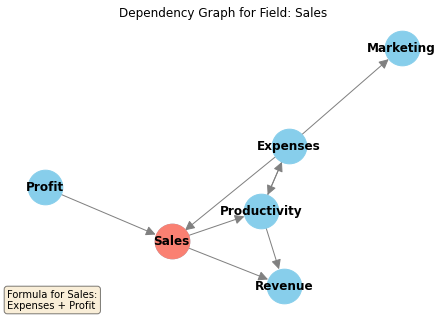

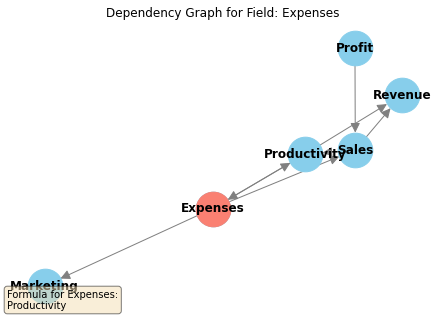

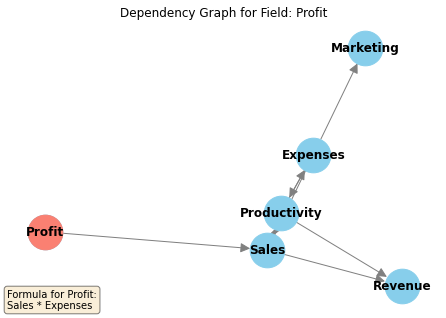

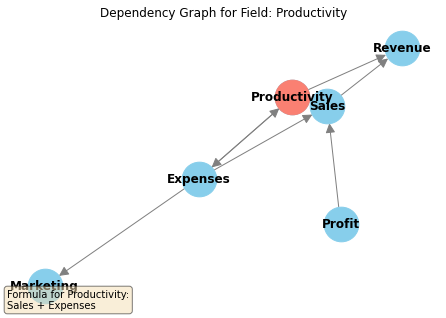

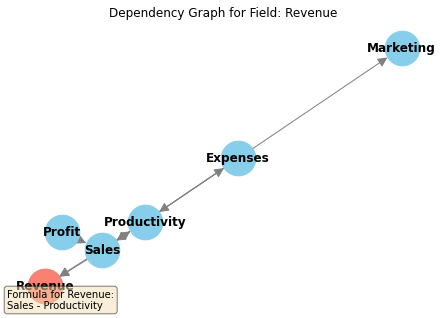

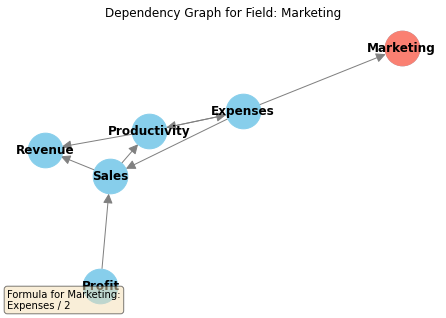

In [1]:
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt

def create_dependency_graph(df, target_field):
    # Create a directed graph
    G = nx.DiGraph()

    # Add nodes and edges based on the dependencies in the data frame
    for _, row in df.iterrows():
        field_name = row['Field']
        variables = row['Variables']
        formula = row['Formula']

        # Add nodes for the field and its variables
        G.add_node(field_name, label=field_name)
        G.add_nodes_from(variables)

        # Add edges from variables to the field
        for variable in variables:
            G.add_edge(variable, field_name)

    # Draw the graph with labels
    pos = nx.spring_layout(G)
    nx.draw(G, pos, with_labels=True, font_weight='bold', node_color='skyblue', node_size=1200, edge_color='gray', linewidths=1, arrowsize=20)

    # Add footnote with formula for the target field
    formula_text = f"Formula for {target_field}:\n{df.loc[df['Field'] == target_field, 'Formula'].values[0]}"
    plt.annotate(formula_text, xy=(0, 0), xycoords='axes fraction', fontsize=10, ha='left', va='bottom', bbox=dict(boxstyle='round', facecolor='wheat', alpha=0.5))

    # Highlight the target field
    nx.draw_networkx_nodes(G, pos, nodelist=[target_field], node_color='salmon', node_size=1200)

    # Display the graph
    plt.title(f"Dependency Graph for Field: {target_field}")
    plt.show()

# Example usage with more meaningful field names
data = {'Field': ['Sales', 'Expenses', 'Profit', 'Productivity', 'Revenue', 'Marketing'],
        'Variables': [['Expenses', 'Profit'], ['Productivity'], [], ['Sales', 'Expenses'], ['Sales', 'Productivity'], ['Expenses']],
        'Formula': ['Expenses + Profit', 'Productivity', 'Sales * Expenses', 'Sales + Expenses', 'Sales - Productivity', 'Expenses / 2']}
df = pd.DataFrame(data)

# Create graphs for all fields
for field in df['Field']:
    create_dependency_graph(df, field)
